In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf

from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = pathlib.Path('Images')

In [3]:
print(data_dir)

Images


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [5]:
print(image_count)

220


Images/trex/20210513_202123.jpg


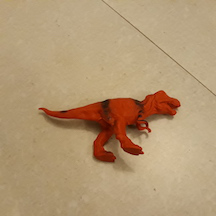

In [6]:
trexes = list(data_dir.glob('trex/*'))
print(str(trexes[0]))
PIL.Image.open(str(trexes[0]))

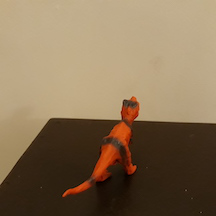

In [7]:
PIL.Image.open(str(trexes[1]))

In [8]:
brachios = list(data_dir.glob('brachiosaurus/*'))

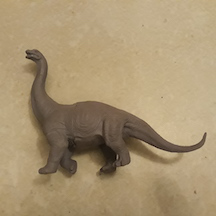

In [9]:
PIL.Image.open(str(brachios[0]))

In [10]:
batch_size = 55
image_height = 216
image_width = 216

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.1,
subset="training",
seed=123,
image_size=(image_height, image_width),
batch_size=batch_size)

Found 220 files belonging to 2 classes.
Using 198 files for training.


In [14]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.1,
subset="validation",
seed=123,
image_size=(image_height, image_width),
batch_size=batch_size)

Found 220 files belonging to 2 classes.
Using 22 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['Brachiosaurus', 'Trex']


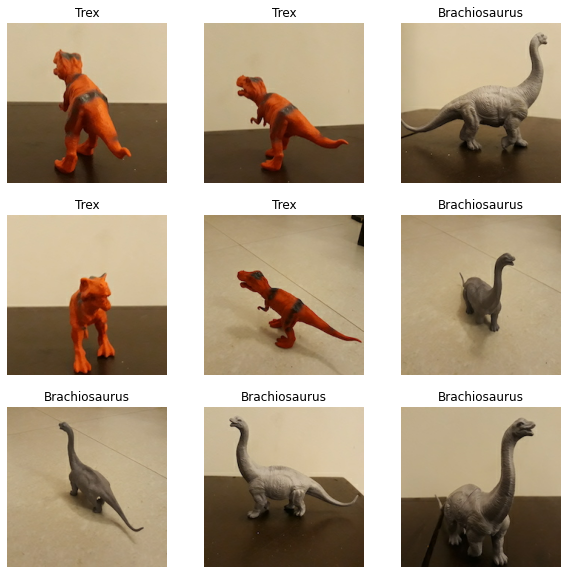

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
num_classes = 2
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)    
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 216, 216, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 216, 216, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0

In [19]:
model.compile(optimizer='Adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 216, 216, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 216, 216, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0

In [22]:
epochs=40
history=model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/40
4/4 [==============================] - 2s 275ms/step - loss: 1.5307 - accuracy: 0.5174 - val_loss: 0.9056 - val_accuracy: 0.5455
Epoch 2/40
4/4 [==============================] - 1s 241ms/step - loss: 0.9039 - accuracy: 0.4972 - val_loss: 0.6837 - val_accuracy: 0.4545
Epoch 3/40
4/4 [==============================] - 1s 239ms/step - loss: 0.6724 - accuracy: 0.4990 - val_loss: 0.6745 - val_accuracy: 0.4545
Epoch 4/40
4/4 [==============================] - 1s 238ms/step - loss: 0.6061 - accuracy: 0.4996 - val_loss: 0.5273 - val_accuracy: 1.0000
Epoch 5/40
4/4 [==============================] - 1s 235ms/step - loss: 0.4476 - accuracy: 0.9960 - val_loss: 0.3044 - val_accuracy: 0.9545
Epoch 6/40
4/4 [==============================] - 1s 236ms/step - loss: 0.2523 - accuracy: 0.9689 - val_loss: 0.0895 - val_accuracy: 1.0000
Epoch 7/40
4/4 [==============================] - 1s 237ms/step - loss: 0.0835 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 8/40
4/4 [====

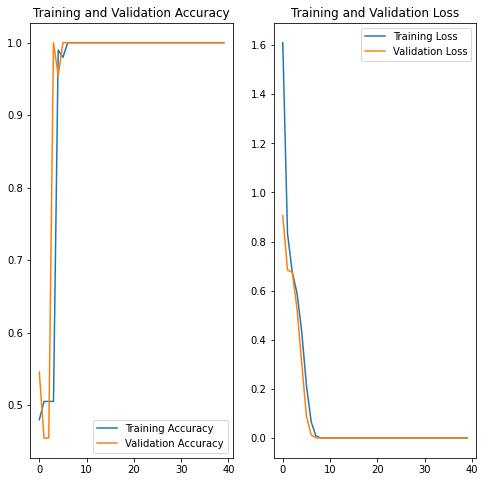

In [24]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [63]:
img = keras.preprocessing.image.load_img(
    'Test/20210513_195812.jpg', target_size=(image_height, image_width)
)

In [64]:
print(img)

<PIL.Image.Image image mode=RGB size=216x216 at 0x16A5D8490>


In [65]:
img.show()

In [66]:
image_arr = keras.preprocessing.image.img_to_array(img)

In [67]:
print(image_arr)

[[[232. 218. 183.]
  [232. 218. 183.]
  [235. 219. 183.]
  ...
  [ 80.  57.  43.]
  [ 83.  60.  44.]
  [ 87.  64.  48.]]

 [[230. 216. 181.]
  [228. 212. 178.]
  [234. 218. 182.]
  ...
  [ 81.  58.  40.]
  [ 83.  60.  42.]
  [ 80.  54.  37.]]

 [[229. 215. 180.]
  [232. 216. 182.]
  [230. 214. 180.]
  ...
  [ 89.  67.  46.]
  [ 80.  57.  39.]
  [ 82.  59.  41.]]

 ...

 [[223. 204. 171.]
  [226. 207. 174.]
  [230. 211. 178.]
  ...
  [ 89.  68.  41.]
  [ 84.  63.  36.]
  [ 87.  66.  37.]]

 [[225. 206. 173.]
  [229. 210. 177.]
  [224. 205. 172.]
  ...
  [ 78.  57.  30.]
  [ 85.  64.  37.]
  [ 79.  58.  31.]]

 [[224. 205. 172.]
  [224. 205. 172.]
  [221. 202. 169.]
  ...
  [ 81.  60.  33.]
  [ 78.  57.  30.]
  [ 83.  62.  35.]]]


In [30]:
image_arr = tf.expand_dims(image_arr, 0)

In [31]:
print(image_arr)

tf.Tensor(
[[[[232. 218. 183.]
   [232. 218. 183.]
   [235. 219. 183.]
   ...
   [ 80.  57.  43.]
   [ 83.  60.  44.]
   [ 87.  64.  48.]]

  [[230. 216. 181.]
   [228. 212. 178.]
   [234. 218. 182.]
   ...
   [ 81.  58.  40.]
   [ 83.  60.  42.]
   [ 80.  54.  37.]]

  [[229. 215. 180.]
   [232. 216. 182.]
   [230. 214. 180.]
   ...
   [ 89.  67.  46.]
   [ 80.  57.  39.]
   [ 82.  59.  41.]]

  ...

  [[223. 204. 171.]
   [226. 207. 174.]
   [230. 211. 178.]
   ...
   [ 89.  68.  41.]
   [ 84.  63.  36.]
   [ 87.  66.  37.]]

  [[225. 206. 173.]
   [229. 210. 177.]
   [224. 205. 172.]
   ...
   [ 78.  57.  30.]
   [ 85.  64.  37.]
   [ 79.  58.  31.]]

  [[224. 205. 172.]
   [224. 205. 172.]
   [221. 202. 169.]
   ...
   [ 81.  60.  33.]
   [ 78.  57.  30.]
   [ 83.  62.  35.]]]], shape=(1, 216, 216, 3), dtype=float32)


In [32]:
predictions = model.predict(image_arr)

In [33]:
print(predictions)

[[-41.595707  41.720104]]


In [34]:
score = tf.nn.softmax(predictions[0])

In [35]:
print(score)

tf.Tensor([6.5524384e-37 1.0000000e+00], shape=(2,), dtype=float32)


In [36]:
print("This is a {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

This is a Trex with a 100.00 percent confidence


In [34]:
model.save('./saved')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ./saved/assets


In [35]:
loaded_model = tf.keras.models.load_model('./saved')